<a href="https://colab.research.google.com/github/valid999/FeedForward-CNN_neuralnetwork/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



# Device configration
device = torch.device('cuda' if torch.cuda.is_available()  else 'cpu')



# Hyper-parameters

num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


# MNIST dataset
train_dataset  = torchvision.datasets.MNIST(root = '../../data',
                                           train  = True,
                                           transform = transforms.ToTensor(),
                                           download = True
                                           )
test_dataset = torchvision.datasets.MNIST(root = '../../data',
                                          train = False ,
                                          transform =  transforms.ToTensor()
                                          )


# Data Loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset ,
                                           batch_size = batch_size ,

                                           shuffle = True

                                           )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# Convolutional neural network (two convolutional layer)

class ConvNet(nn.Module):
  def __init__(self , num_classes = 10):
    super(ConvNet , self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1 , 16 , kernel_size = 5 , stride = 1 , padding = 2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 , stride = 2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(16 , 32 , kernel_size = 5 , stride = 1 , padding = 2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2 , stride = 2))
    self.fc = nn.Linear(7*7*32 , num_classes)



  def forward(self , x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0) , -1)
    out = self.fc(out)
    return out




model = ConvNet(num_classes).to(device)

# Losss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate)



# Train the model
# total the model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i , (image , labels) in enumerate(train_loader):
    # Move tensor to the configured device
    images = image.to(device) # Orginal shape ([100 , 1 , 28 , 28])
    labels = labels.to(device)


    # Forward pass
    outputs = model(images)
    loss = criterion(outputs , labels)


    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0 :
      print('Epoch [{}/{}] , Step[{}/{}] , Loss: {:.4f}'.format(epoch+1 , num_epochs , i+1 , total_step , loss.item()))




Epoch [1/5] , Step[100/600] , Loss: 0.0802
Epoch [1/5] , Step[200/600] , Loss: 0.1252
Epoch [1/5] , Step[300/600] , Loss: 0.0313
Epoch [1/5] , Step[400/600] , Loss: 0.0617
Epoch [1/5] , Step[500/600] , Loss: 0.0135
Epoch [1/5] , Step[600/600] , Loss: 0.0228
Epoch [2/5] , Step[100/600] , Loss: 0.0427
Epoch [2/5] , Step[200/600] , Loss: 0.0589
Epoch [2/5] , Step[300/600] , Loss: 0.0990
Epoch [2/5] , Step[400/600] , Loss: 0.1023
Epoch [2/5] , Step[500/600] , Loss: 0.0791
Epoch [2/5] , Step[600/600] , Loss: 0.0454
Epoch [3/5] , Step[100/600] , Loss: 0.0667
Epoch [3/5] , Step[200/600] , Loss: 0.0117
Epoch [3/5] , Step[300/600] , Loss: 0.0043
Epoch [3/5] , Step[400/600] , Loss: 0.0485
Epoch [3/5] , Step[500/600] , Loss: 0.0062
Epoch [3/5] , Step[600/600] , Loss: 0.0050
Epoch [4/5] , Step[100/600] , Loss: 0.0099
Epoch [4/5] , Step[200/600] , Loss: 0.0116
Epoch [4/5] , Step[300/600] , Loss: 0.0292
Epoch [4/5] , Step[400/600] , Loss: 0.0203
Epoch [4/5] , Step[500/600] , Loss: 0.0640
Epoch [4/5]

In [6]:
# The orginal shape of the images

for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.shape
        print(images)
        break

torch.Size([100, 1, 28, 28])


In [7]:
def show_example(img , label):
  plt.show(img.permute(1 , 2 , 0))

In [11]:
with torch.no_grad():
  correct = 0
  total = 0

  for images , labels in test_loader:
    images = image.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _ , predicted = torch.max(outputs.data , 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()




  print('Accuracy of the network on the 10000 test images : {} %'.format(100 * correct / total))



Accuracy of the network on the 10000 test images : 10.16 %


first batch
torch.Size([100, 1, 28, 28])
tensor([7, 6, 4, 0, 1, 7, 7, 4, 7, 7, 0, 4, 3, 3, 5, 3, 3, 9, 5, 4, 7, 3, 5, 0,
        9, 5, 0, 3, 1, 2, 6, 0, 9, 0, 3, 8, 2, 9, 4, 0, 9, 4, 9, 4, 6, 1, 0, 8,
        7, 5, 6, 3, 6, 1, 3, 8, 2, 9, 0, 2, 2, 4, 5, 6, 4, 7, 1, 6, 9, 7, 7, 5,
        7, 1, 1, 7, 8, 5, 3, 8, 2, 8, 2, 5, 8, 9, 1, 7, 0, 3, 9, 1, 7, 1, 4, 4,
        7, 1, 7, 6])
<class 'torch.Tensor'>


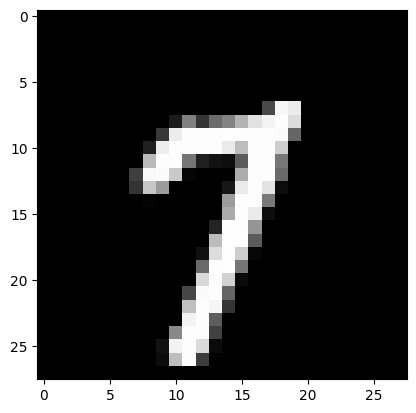

In [12]:
for img_batch , label_batch in train_loader:
  print('first batch')
  print(img_batch.shape)
  plt.imshow(img_batch[0][0] , cmap = 'gray')
  print(label_batch)
  print(type(img_batch))
  break

In [13]:
# Save the model checkpoint
torch.save(model.state_dict() , 'model.ckpt')

In [14]:

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [ ]:
# for img, label in test_loader:

#   plt.imshow(img[0][0], cmap='gray')
#   print('Label:', label, ', Predicted:', predict_image(img, model))